In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
%matplotlib inline


In [122]:
cropped_path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\croped_face_images'

In [123]:
y_data_path=r'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\y_data.csv'

In [124]:
y_data=pd.read_csv(y_data_path)

##data preparation and make x and y data

In [140]:
x=[]
y=[]
for path in os.scandir(cropped_path):
    img_path=path.path
    
    label=img_path.split('\\')[-1].split('.')[0][:-2]
    y.append(label)
    print(label)
    
    img=cv2.imread(img_path)
    
    resized_image = cv2.resize(img, (128,128))
    
    rgb_img=cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
    
    x.append(rgb_img)

Aaron_Eckhart
Aaron_Eckhart
Aaron_Guiel
Aaron_Peirsol
Aaron_Peirsol
Aaron_Pena
Aaron_Pena
Aaron_Sorkin
Aaron_Tippin
Aaron_Tippin
Abbas_Kiarostami
Abbas_Kiarostami
Abba_Eban
Abba_Eban
Abdel_Aziz_Al-Hakim
Abdoulaye_Wade
Abdoulaye_Wade
Abdulaziz_Kamilov
Abdulaziz_Kamilov
Abdulaziz_Kamilov
Abdullah
Abdullah
Abdullah
Abdullah_Ahmad_Badawi
Abdullah_Ahmad_Badawi
Abdullah_Ahmad_Badawi
Abdullah_al-Attiyah
Abdullah_al-Attiyah
Abdullah_Gul
Abdullah_Gul
Abdullah_Gul
Abdullatif_Sener
Abdul_Majeed_Shobokshi
Abdul_Majeed_Shobokshi
Abel_Aguilar
Abel_Aguilar
Abel_Pacheco
Abel_Pacheco
Abid_Hamid_Mahmud_Al-Tikriti
Abid_Hamid_Mahmud_Al-Tikriti
Abraham_Foxman
Abraham_Foxman
Aby_Har-Even
Aby_Har-Even
Aby_Har-Even
Adam_Ant
Adam_Freier
Adam_Freier
Adam_Herbert
Adam_Kennedy
Adam_Mair
Adam_Mair
Adam_Mair
Adam_Sandler
Adam_Sandler
Adam_Sandler
Adam_Scott
Adam_Scott
Adel_Al-Jubeir
Adel_Al-Jubeir
Adel_Al-Jubeir
Adisai_Bodharamik
Adisai_Bodharamik
Adolfo_Aguilar_Zinser
Adolfo_Aguilar_Zinser
Adolfo_Rodriguez_Saa
Ado

In [141]:
y

['Aaron_Eckhart',
 'Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Peirsol',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdoulaye_Wade',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdulaziz_Kamilov',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Gul',
 'Abdullah_Gul',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Majeed_Shobokshi',
 'Abel_Aguilar',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abraham_Foxman',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Aby_Har-Even',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Mair',
 'Adam_Mair'

In [142]:
x=np.array(x,dtype='uint8')

In [59]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le=LabelEncoder()

In [144]:
y_en=le.fit_transform(y)

In [145]:
y_en[:10]

array([2, 2, 3, 4, 4, 5, 5, 6, 7, 7], dtype=int64)

In [146]:
print(le.inverse_transform([5]))

['Aaron_Pena']


In [163]:
x_samples=x[:2000]
y_en_samples=y_en[:2000]

In [175]:
y_en_samples.max()

911

In [67]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x_samples,y_en_samples,test_size=0.3)

In [165]:
x_train.shape

(1400, 128, 128, 3)

In [166]:
y_train.shape

(1400,)

In [167]:
x_test.shape

(600, 128, 128, 3)

In [168]:
y_test.shape

(600,)

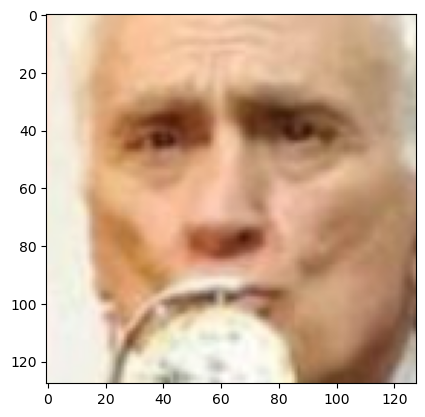

In [169]:
plt.imshow(x_train[0])

In [170]:
y_train[0]

902

In [172]:
le.inverse_transform([902])

array(['Dick_Latessa'], dtype='<U35')

In [173]:
data_augmentation = tf.keras.Sequential([
   layers.RandomFlip("horizontal"),  
   layers.RandomRotation(0.1),       
   layers.RandomZoom(0.2),           
   layers.RandomTranslation(0.2, 0.2)
])

sample_image = tf.random.uniform([128, 128, 3])  
sample_image = tf.expand_dims(sample_image, 0)  

augmented_image = data_augmentation(sample_image)

In [177]:
model =keras.models.Sequential([
    data_augmentation,  # Add the data augmentation layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(912, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20


C:\Users\MAHIREDDY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 816ms/step - accuracy: 0.0000e+00 - loss: 35.4275
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 631ms/step - accuracy: 0.0013 - loss: 6.8153
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 704ms/step - accuracy: 9.5544e-04 - loss: 6.8044
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 581ms/step - accuracy: 0.0038 - loss: 6.7992
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 577ms/step - accuracy: 0.0022 - loss: 6.7935
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 651ms/step - accuracy: 0.0016 - loss: 6.7901
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 568ms/step - accuracy: 0.0000e+00 - loss: 6.7838
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 620ms/step - accuracy: 0.0018 - loss: 6.7796
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 702ms/step - accuracy: 0.0042 - loss: 6.7744
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 628ms/step - accuracy: 0.0025 - loss: 6.7702
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 564ms/step - accuracy: 8.9757e-04 - loss: 6.7665
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━

In [178]:
model.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.0000e+00 - loss: 6.9734


[6.971078872680664, 0.0]

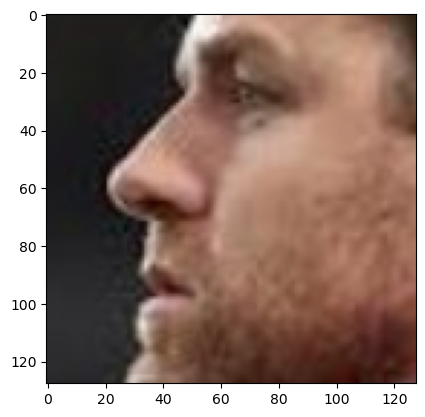

In [180]:
plt.imshow(x_test[0])

In [181]:
y_test[0]

543

In [184]:
le.inverse_transform([320])

array(['Bart_Freundlich'], dtype='<U35')

In [182]:
np.argmax(model.predict(x_test)[0])

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


320

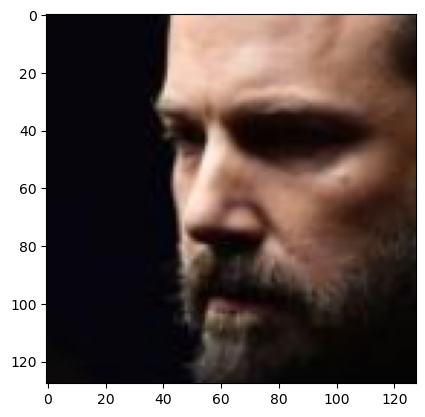

In [105]:
plt.imshow(x_train[0])

In [107]:
y_train[0]

329

In [52]:
np.argmax(model.predict(x_train_samples[:10])[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


3

In [ ]:
def return_predictions(path):
    img=cv2.imread(path)
    

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [ ]:
model=keras.models.Sequential([
    base_model,
    Flatten()(x),
    Dense(1024, activation='relu')(x),
    Dense(num_classes, activation='softmax')(x) 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,batch_size=10)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the pre-trained base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(3892, activation='softmax')(x)  # Output layer for 3000+ classes

# Define the new model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Choose the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=20)
